## Lesson 2. Reproject Vector Data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import earthpy as et

In [2]:
sns.set_style('white')
sns.set(font_scale=1.5)

In [3]:
data_path = et.data.get_data('spatial-vector-lidar')

In [4]:
sjer_roads = gpd.read_file(os.path.join(data_path.strip('.'),
                                        'california',
                                        'madera-county-roads',
                                        'tl_2013_06039_roads.shp'))

In [5]:
sjer_aoi = gpd.read_file(os.path.join(data_path.strip('.'),
                                      'california',
                                      'neon-sjer-site',
                                      'vector_data',
                                      'SJER_crop.shp'))                                             

In [6]:
print(sjer_roads.crs)
print(sjer_aoi.crs)

epsg:4269
epsg:32611


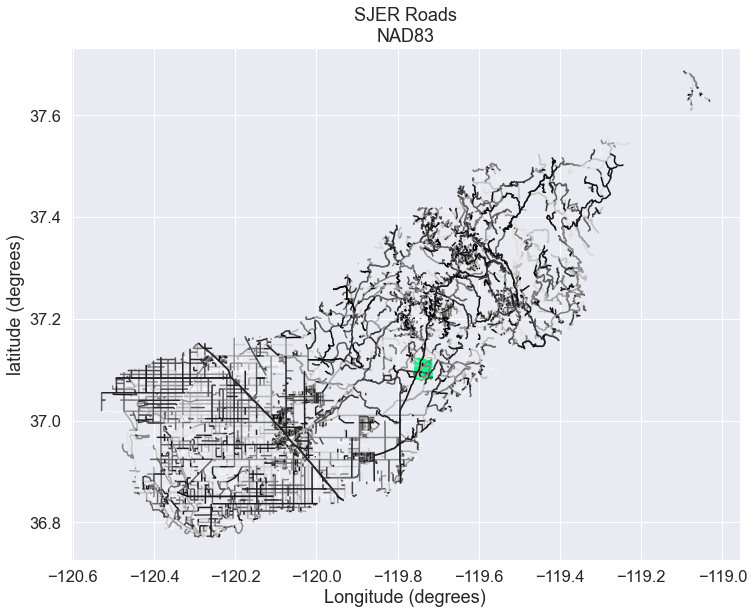

In [7]:
fig, ax = plt.subplots(figsize=(12,12))

sjer_roads.plot(ax=ax,
                cmap='Greys')
sjer_aoi.to_crs(crs=sjer_roads.crs).plot(ax=ax,
                                                 color='springgreen')
ax.set(title='SJER Roads\nNAD83',
       xlabel='Longitude (degrees)',
       ylabel='latitude (degrees)')
plt.show()

#### Plot two layers with reprojection again, but this time using census data

Read US state boundary file

In [8]:
state_bdy_us = gpd.read_file(os.path.join(data_path,
                                          'usa',
                                          'usa-states-census-2014.shp'))
type(state_bdy_us)

geopandas.geodataframe.GeoDataFrame

In [9]:
state_bdy_us

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."
5,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,Midwest,"POLYGON Z ((-91.50617 40.20064 0.00000, -91.49..."
6,19,01779785,0400000US19,19,IA,Iowa,00,144668594415,1076856589,Midwest,"POLYGON Z ((-96.62187 42.77925 0.00000, -96.57..."
7,21,01779786,0400000US21,21,KY,Kentucky,00,102262419204,2393338940,Southeast,"POLYGON Z ((-89.54443 36.57451 0.00000, -89.47..."
8,22,01629543,0400000US22,22,LA,Louisiana,00,111901043977,23750204105,Southeast,"POLYGON Z ((-94.04305 32.69303 0.00000, -94.04..."
9,24,01714934,0400000US24,24,MD,Maryland,00,25147575220,6983455225,Northeast,"MULTIPOLYGON Z (((-76.04621 38.02553 0.00000, ..."


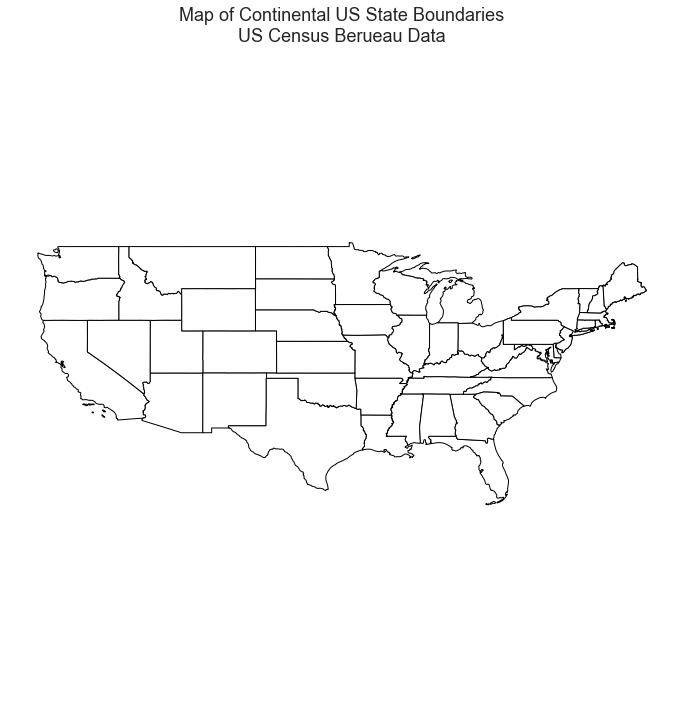

In [10]:
fig, ax = plt.subplots(figsize=(12,12))

state_bdy_us.plot(ax=ax,
                  facecolor='white',
                  edgecolor='black')

ax.set(title='Map of Continental US State Boundaries\nUS Census Berueau Data')

# Turn off the axis
plt.axis('equal')
ax.set_axis_off()

plt.show()

Add a boundary layer of the US to make it look nicer. Thicker linewidth to make it pop. (Bleh)

In [11]:
country_bdy_us = gpd.read_file(os.path.join(data_path,
                                            'usa',
                                            'usa-boundary-dissolved.shp'))
country_bdy_us

,NAME,geometry
0,United States,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."


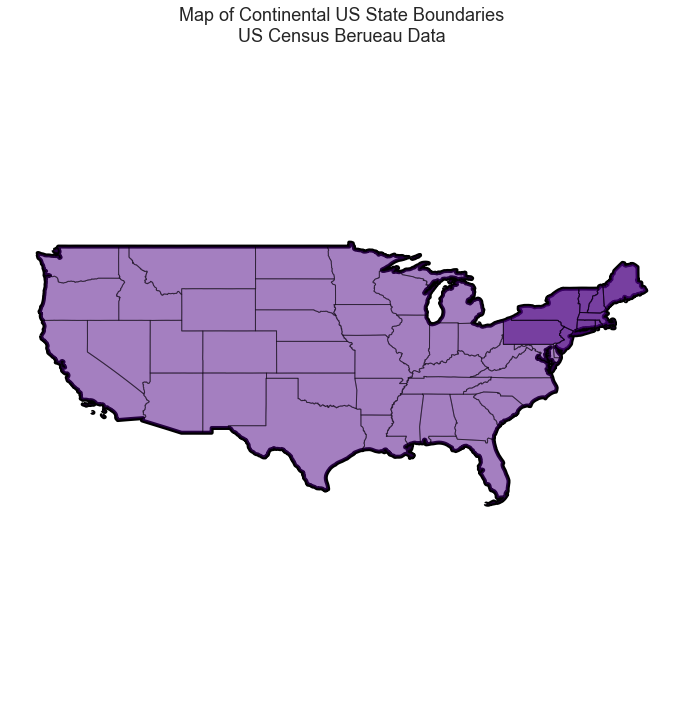

In [12]:
fig, ax = plt.subplots(figsize=(12,12))

country_bdy_us.plot(ax=ax,
                    alpha=1,
                    edgecolor='black',
                    color='white',
                    linewidth=4)

state_bdy_us.plot(ax=ax,
                  color='indigo',
                  edgecolor='black',
                  linewidth=1,
                  alpha=0.5)

ax.set(title='Map of Continental US State Boundaries\nUS Census Berueau Data')

# Turn off the axis
plt.axis('equal')
ax.set_axis_off()

plt.show()

Next add the AOI as another layer

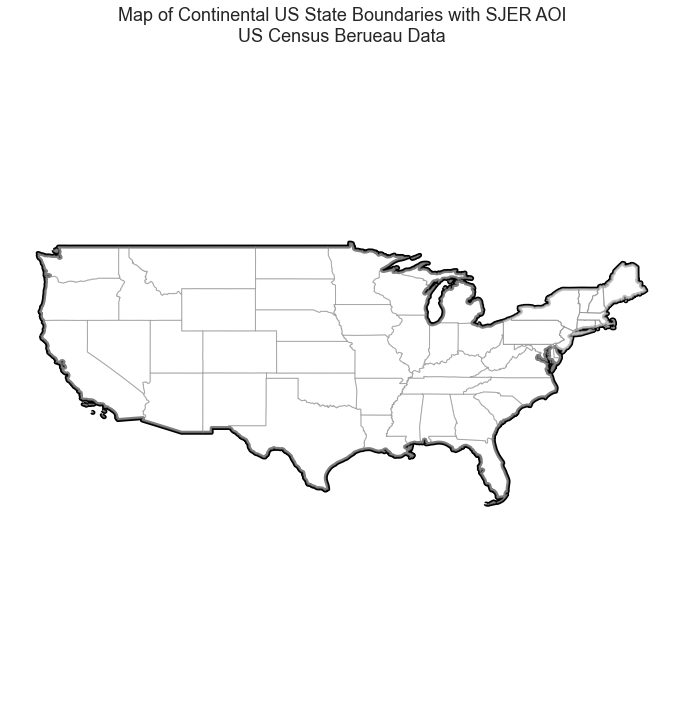

In [14]:
fig, ax = plt.subplots(figsize=(12,12))

country_bdy_us.plot(ax=ax,
                    alpha=1,
                    edgecolor='black',
                    color='white',
                    linewidth=4)

state_bdy_us.plot(ax=ax,
                  color='white',
                  edgecolor='grey',
                  linewidth=1,
                  alpha=0.5)

sjer_aoi.to_crs(country_bdy_us.crs).plot(ax=ax,
                                    color='springgreen')

ax.set(title='Map of Continental US State Boundaries with SJER AOI\nUS Census Berueau Data')

# Turn off the axis
plt.axis('equal')
ax.set_axis_off()

plt.show()

#### Optional Challenge

In [16]:
sjer_aoi.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 120°W to 114°W - by country
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
country_bdy_us.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
state_bdy_us.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

EPSG:32611 is WGS 84 / UTM zone 11N. It is projected.
EPSG:4326 is the identifier for WGS84. It is geographic.

In [19]:
print(sjer_aoi.total_bounds)
print(state_bdy_us.total_bounds)

[ 254570.567      4107303.07684455  258867.40933092 4112361.92026107]
[-124.725839   24.498131  -66.949895   49.384358]


Reproject using the full proj.4 string

In [20]:
sjer_aoi_WGS84_2 = sjer_aoi.to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')

Same plot as above, just with different colours and using proj.4 transformation, and zoomed in using xlim, ylim

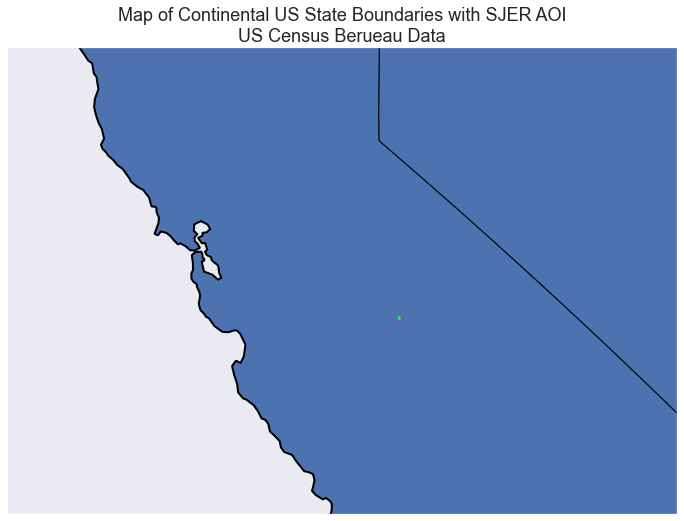

In [30]:
fig, ax = plt.subplots(figsize=(12,12))

country_bdy_us.plot(ax=ax,
                    alpha=1,
                    color='white',
                    edgecolor='black',
                    linewidth=3)

state_bdy_us.plot(ax=ax,
                  edgecolor='black',
                  linewidth=1,
                  alpha=1)

sjer_aoi_WGS84_2.plot(ax=ax,
                      color='springgreen',
                      edgecolor='r')

ax.set(title='Map of Continental US State Boundaries with SJER AOI\nUS Census Berueau Data')
ax.set(xlim=[-125,-116], ylim=[35,40])

# Turn off the axis
#plt.axis('equal')
#ax.set_axis_off()

# Have to use a different method to turn off the axis or it resets the xlim, ylim call
ax.set(xticks=[], yticks=[])

plt.show()

Since the polygon is really too small to see convert it to a CENTROID (Point) and plot again

To do this access the <code>centroid</code> attribute of the AOI polygon using the <code>.centroid</code> method.

In [31]:
AOI_point = sjer_aoi_WGS84_2['geometry'].centroid
AOI_point

<ipython-input-31-d559348b3d41>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  AOI_point = sjer_aoi_WGS84_2['geometry'].centroid


0    POINT (-119.73765 37.10324)
dtype: geometry

In [32]:
type(AOI_point)

geopandas.geoseries.GeoSeries

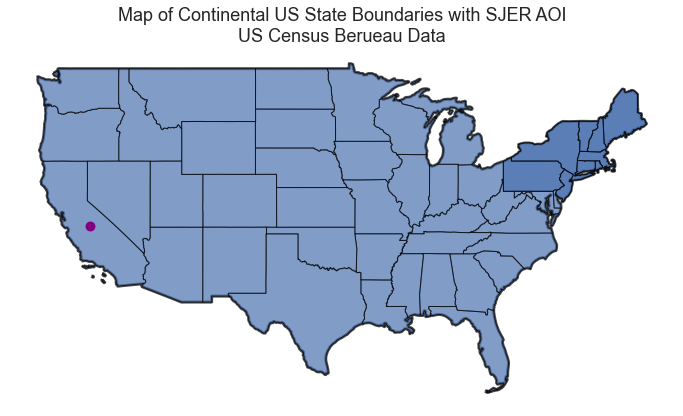

In [34]:
fig, ax = plt.subplots(figsize=(12,7))

country_bdy_us.plot(ax=ax,
                    alpha=0.7,
                    color='white',
                    edgecolor='black',
                    linewidth=3)

state_bdy_us.plot(ax=ax,
                  edgecolor='black',
                  linewidth=1,
                  alpha=0.7)

AOI_point.plot(ax=ax,
               markersize=80,
               color='purple')

ax.set(title='Map of Continental US State Boundaries with SJER AOI\nUS Census Berueau Data')
#ax.set(xlim=[-125,-116], ylim=[35,40])

# Turn off the axis
#plt.axis('equal')
ax.set_axis_off()

# Have to use a different method to turn off the axis or it resets the xlim, ylim call
#ax.set(xticks=[], yticks=[])

plt.show()